In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from datetime import datetime
from datetime import timedelta, date
quandl.ApiConfig.api_key= '1ssLPs8xYzykLMyAj-je'#MY KEY, GET YOUR OWN

In [3]:
df = pd.read_csv("constituents.csv")

In [4]:
tickers = df["Symbol"][:50]#tickers in this csv

In [28]:
price_df = pd.DataFrame()
for ticker in tickers[0:15]:
    price_df[ticker] = quandl.get("WIKI/" + ticker, start_date=str(datetime(2004, 1, 1).date()), end_date = str(date.today()))["Close"]

In [62]:
def portfolio_corr(t_weights, stock, M):
    """ t_weights is a TICKER, WEIGHT value pair representing the weight of TICKER in input portfolio """ 
    return sum([M.loc[stock, ticker]*t_weights[ticker] for ticker in t_weights])
def annual_variance(ticker, M):
    """ M is a timeseries matrix"""
    year_list = price_df.index.tolist()
    M['year'] = list(map(lambda x: x.to_pydatetime().year, year_list))
    return M.groupby('year')[ticker].var()

In [67]:
M = price_df.dropna().corr()
portfolio = {"ABT":0.5, "ACN": 0.5}
X = {}
for ticker in tickers[0:15]:
    corr = portfolio_corr(portfolio, ticker, M)
    year_var = annual_variance(ticker, price_df)[2017]
    X[ticker] = [corr, year_var ** (1/2)]
data_df = pd.DataFrame(X)

,A,AAP,ABBV,ABT,ACN,ADBE,AES,AET,AFL,AKAM,AMG,APD,ATVI,AYI,MMM
0,0.091633,0.506539,0.825793,0.791013,0.791013,0.803059,-0.351267,0.845834,0.665686,0.386498,0.011772,0.747527,0.763943,0.652958,0.815860
1,5.502800,26.146295,7.603870,3.622026,6.182025,14.195511,0.259348,13.963411,4.391163,8.328118,11.961123,4.306270,8.500376,18.143482,11.933305


In [63]:
annual_variance("ABT", price_df)

year
2004     3.759715
2005     9.410574
2006     7.581906
2007     5.296434
2008     6.555426
2009    16.554360
2010     7.640215
2011     6.826904
2012    18.323205
2013     2.692020
2014     5.649396
2015     6.952215
2016     4.917740
2017    13.119075
Name: ABT, dtype: float64

In [81]:
plot_df = pd.DataFrame({'corr': data_df.iloc[0], 'sigma': data_df.iloc[1]})
plot_df.plot(kind='scatter', x='corr', y='sigma')
plot_df.head()

,corr,sigma
A,0.091633,5.502800
AAP,0.506539,26.146295
ABBV,0.825793,7.603870
ABT,0.791013,3.622026
ACN,0.791013,6.182025


In [79]:
plot_df.corr()

,corr,sigma
corr,1.000000,0.230013
sigma,0.230013,1.000000


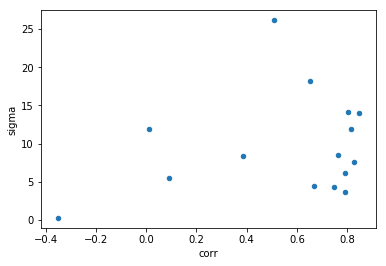

In [78]:
plt.show()